# Car Pricing:

## initializing dataset

In [170]:
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [171]:
df = pd.read_csv("/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_6/task_2/train.csv")

In [172]:

df.drop(columns=["Doors"], inplace=True)

In [173]:
# Remove Price column
price_col = df.pop("Price")
df.insert(16, "Price", price_col)



In [174]:
df = df.loc[(df["Price"] < 600000) & (df["Price"] > 500)]

In [175]:
df

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,Left wheel,Grey,12,5802
19232,45798355,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5,8467
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8,15681
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4,26108


In [176]:
df = df.loc[df["Price"] < 80000].copy()
df

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,Left wheel,Grey,12,5802
19232,45798355,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5,8467
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8,15681
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4,26108


In [177]:
df['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [178]:
df['Levy'] = df['Levy'].astype('string').apply(lambda x: 0 if x == '-' else x).astype(int)
df["Manufacturer"] = df['Manufacturer'].astype('string')
df["Model"] = df['Model'].astype('string')
df["Category"] = df['Category'].astype('string')
df["Leather interior"] = df['Leather interior'].astype('string')
df["Fuel type"] = df['Fuel type'].astype('string')
df["Engine volume"] = df['Engine volume'].astype('string').str.split(" ").str[0].astype('float')
df["Mileage"] = df['Mileage'].astype('string').str.split(" ").str[0].astype('int')
df["Gear box type"] = df['Gear box type'].astype('string')
df["Drive wheels"] = df['Drive wheels'].astype('string')
df["Wheel"] = df['Wheel'].astype('string')
df["Color"] = df['Color'].astype('string')



In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17340 entries, 0 to 19235
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                17340 non-null  int64  
 1   Levy              17340 non-null  int64  
 2   Manufacturer      17340 non-null  string 
 3   Model             17340 non-null  string 
 4   Prod. year        17340 non-null  int64  
 5   Category          17340 non-null  string 
 6   Leather interior  17340 non-null  string 
 7   Fuel type         17340 non-null  string 
 8   Engine volume     17340 non-null  float64
 9   Mileage           17340 non-null  int64  
 10  Cylinders         17340 non-null  float64
 11  Gear box type     17340 non-null  string 
 12  Drive wheels      17340 non-null  string 
 13  Wheel             17340 non-null  string 
 14  Color             17340 non-null  string 
 15  Airbags           17340 non-null  int64  
 16  Price             17340 non-null  int64  
dty

## Encoding Textual data

In [180]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
label_encoder = LabelEncoder()



In [181]:
df["Manufacturer"] = label_encoder.fit_transform(df["Manufacturer"])

In [182]:
df["Model"] = label_encoder.fit_transform(df["Model"])

In [183]:
df["Category"] = label_encoder.fit_transform(df["Category"])


In [184]:
df["Fuel type"] = label_encoder.fit_transform(df["Fuel type"])


In [185]:
xx = ohe.fit_transform(df[["Gear box type"]])

df = pd.concat([df, xx], axis=1).drop(columns=["Gear box type"])



In [186]:
xx = ohe.fit_transform(df[["Drive wheels"]])

df = pd.concat([df, xx], axis=1).drop(columns=["Drive wheels"])


In [187]:
xx = ohe.fit_transform(df[["Color"]])

df = pd.concat([df, xx], axis=1).drop(columns=["Color"])


In [188]:
df["Leather interior"] = label_encoder.fit_transform(df["Leather interior"])

In [189]:
df["Wheel"] = label_encoder.fit_transform(df["Wheel"])

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17340 entries, 0 to 19235
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       17340 non-null  int64  
 1   Levy                     17340 non-null  int64  
 2   Manufacturer             17340 non-null  int64  
 3   Model                    17340 non-null  int64  
 4   Prod. year               17340 non-null  int64  
 5   Category                 17340 non-null  int64  
 6   Leather interior         17340 non-null  int64  
 7   Fuel type                17340 non-null  int64  
 8   Engine volume            17340 non-null  float64
 9   Mileage                  17340 non-null  int64  
 10  Cylinders                17340 non-null  float64
 11  Wheel                    17340 non-null  int64  
 12  Airbags                  17340 non-null  int64  
 13  Price                    17340 non-null  int64  
 14  Gear box type_Automatic  17

## Splitting into train and test

In [191]:
price_col = df.pop("Price")
df.insert(36, "Price", price_col)

In [192]:
X = df.iloc[:, 1:36]
X

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1399,30,1195,2010,4,1,2,3.5,186005,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1018,7,636,2011,4,0,5,3.0,192000,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,20,661,2006,3,0,5,1.3,200000,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,862,15,639,2011,4,1,2,2.5,168966,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,446,20,661,2014,3,1,5,1.3,91901,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,1055,34,581,2013,9,1,1,3.5,107800,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19232,0,34,372,1999,1,1,0,2.0,300000,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19233,831,22,1277,2011,9,1,5,2.4,161600,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19234,836,22,1379,2010,4,1,1,2.0,116365,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
y = df.iloc[:, 36]
y

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19231     5802
19232     8467
19233    15681
19234    26108
19235     5331
Name: Price, Length: 17340, dtype: int64

## splitting the data into train and test sets


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Scale the training and test features

In [195]:
minmax = MinMaxScaler(feature_range=(0, 1))
x2 = minmax.fit_transform(X_train[["Engine volume", "Levy", "Mileage", "Airbags"]])
X_train[["Engine volume", "Levy", "Mileage", "Airbags"]] = x2

In [196]:
x2 = minmax.transform(X_test[["Engine volume", "Levy", "Mileage", "Airbags"]])
X_test[["Engine volume", "Levy", "Mileage", "Airbags"]] = x2

# Regression

## Training the Model

In [197]:
'''
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

print(y_test_log)
'''

'\ny_train_log = np.log1p(y_train)\ny_test_log = np.log1p(y_test)\n\nprint(y_test_log)\n'

In [198]:
model = tf.keras.Sequential([

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer='adam',
    metrics=['mae']
)

model.fit(X_train, y_train, epochs=100)

y_pred = model.predict(X_test).ravel()

Epoch 1/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - loss: 11343.1729 - mae: 11343.1729
Epoch 2/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 10283.2178 - mae: 10283.2178
Epoch 3/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 10289.3555 - mae: 10289.3555
Epoch 4/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 10274.5361 - mae: 10274.5361
Epoch 5/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 10275.0811 - mae: 10275.0811
Epoch 6/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 10274.9482 - mae: 10274.9482
Epoch 7/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 10260.8047 - mae: 10260.8047
Epoch 8/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 10252.9443 - mae: 10252.9443
Epoch 9/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 10252.4697 - mae: 10252.4697
Epoch 10/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 10235.5752 - mae: 10235.5752
Epoch 11/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 10229.9658 - ma

In [199]:
lr = LinearRegression()
lr.fit(X_train, y_train)
library_pred = lr.predict(X_test).ravel()

In [200]:
print("for scikitlearn Library = ", r2_score(y_test, library_pred))
print(r2_score(y_test, y_pred))

for scikitlearn Library =  0.2280593610564967
0.11670368909835815


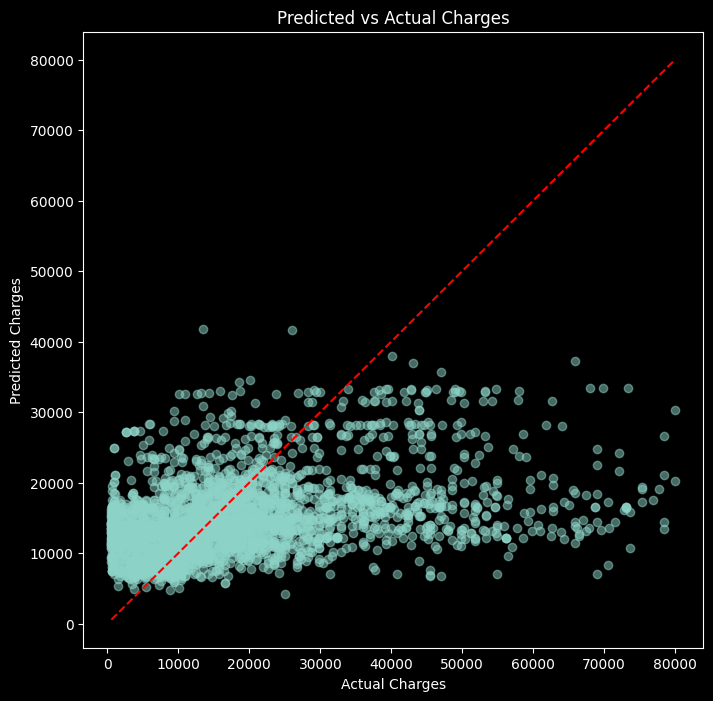

In [201]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()


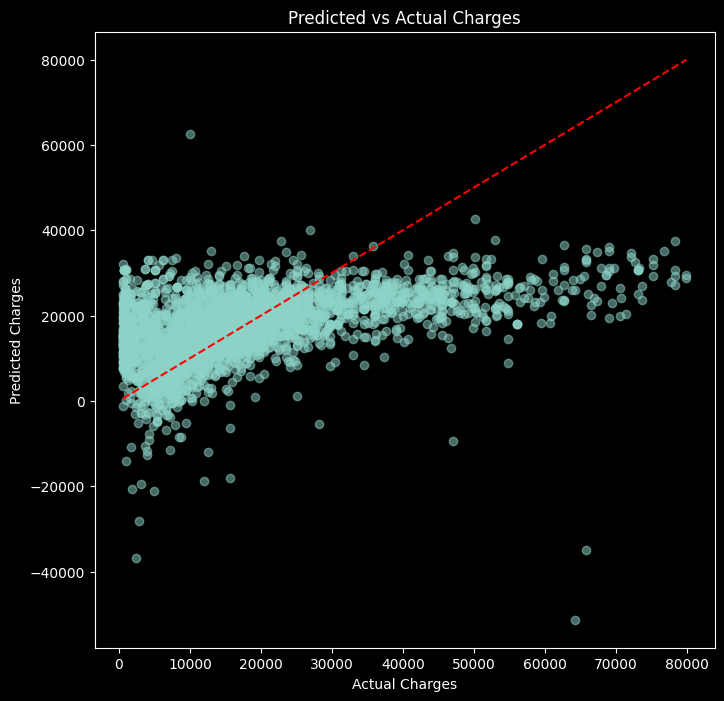

In [202]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, library_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()

In [203]:
X_train

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
9215,0.093819,22,798,2010,9,1,5,0.135,0.000043,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10456,0.000000,22,1402,2012,3,1,5,0.080,0.000057,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9661,0.000000,55,1108,2011,9,1,2,0.120,0.000048,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14847,0.066672,55,420,2012,9,1,5,0.125,0.000070,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12698,0.090063,34,581,2013,9,1,1,0.175,0.000050,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.154601,30,768,2010,4,1,5,0.230,0.000128,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1025,0.028428,15,719,2014,9,1,2,0.100,0.000058,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8086,0.064965,55,1108,2010,3,0,2,0.090,0.000092,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,0.064965,10,902,2010,9,1,5,0.090,0.000024,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Decision Tree

In [204]:
import xgboost as xgb

# DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train regression model
model_xgboost = xgb.train(
    params={"objective": "reg:squarederror", "eval_metric": "mae"},
    dtrain=dtrain,
    num_boost_round=50,
    evals=[(dtrain, "train"), (dtest, "test")]
)


[0]	train-mae:9046.02920	test-mae:9118.14289
[1]	train-mae:7872.27754	test-mae:8038.76413
[2]	train-mae:7020.37672	test-mae:7309.66541
[3]	train-mae:6416.20066	test-mae:6767.68430
[4]	train-mae:6020.11594	test-mae:6425.51163
[5]	train-mae:5700.32565	test-mae:6157.22172
[6]	train-mae:5481.39862	test-mae:5945.14381
[7]	train-mae:5334.15180	test-mae:5824.09598
[8]	train-mae:5129.66453	test-mae:5660.54936
[9]	train-mae:5022.21602	test-mae:5569.80580
[10]	train-mae:4890.27001	test-mae:5470.06599
[11]	train-mae:4805.34554	test-mae:5410.45627
[12]	train-mae:4751.28180	test-mae:5379.67645
[13]	train-mae:4694.13506	test-mae:5328.29963
[14]	train-mae:4606.07358	test-mae:5263.67825
[15]	train-mae:4484.75945	test-mae:5173.86704
[16]	train-mae:4405.01823	test-mae:5119.81636
[17]	train-mae:4386.91955	test-mae:5110.60757
[18]	train-mae:4348.15548	test-mae:5082.29723
[19]	train-mae:4316.97414	test-mae:5051.10319
[20]	train-mae:4245.11206	test-mae:4993.35486
[21]	train-mae:4206.04488	test-mae:4966.1296

In [205]:
y_pred_xg = model_xgboost.predict(dtest)
print(r2_score(y_test, y_pred_xg))

0.7393590211868286


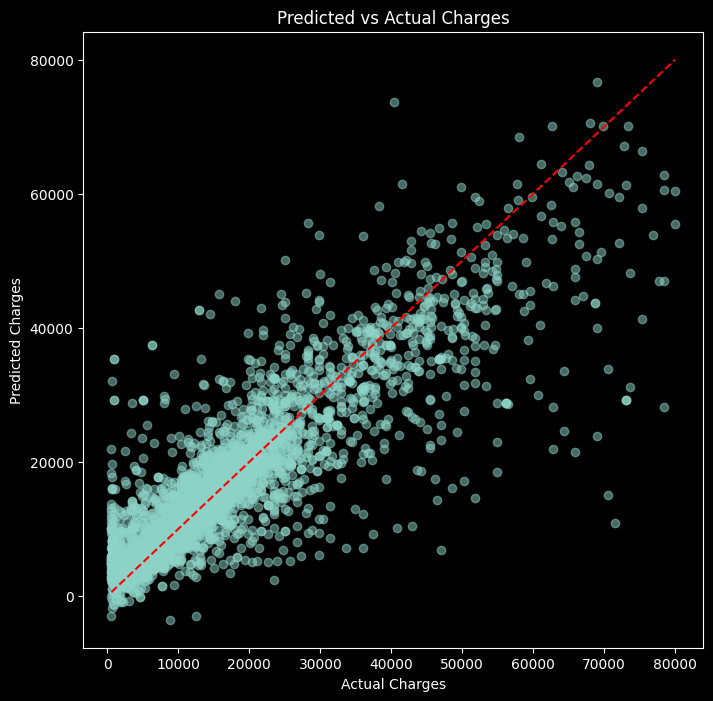

In [206]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_xg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()